# ROC - кривая

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
import timeit

In [2]:
def creat_graph(fpr, tpr, roc_auc, n, m):
    # строим график
    plt.plot(fpr, tpr, color= "cyan",
            label= f'ROC кривая (area = {roc_auc:0.3f}) для {n} соседей и метрики {m}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Пример ROC-кривой')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
def main():
    data = load_breast_cancer()

    # print(np.unique(load_digits().target))

    X = data.data # Данные
    Y = data.target # Целевые показатели

    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42) # Разбиение данных

    scare_minmax = preprocessing.MinMaxScaler()
    # scare_minmax.fit_transform(x_train)
    # scare_minmax.fit_transform(x_test)

    scare_minmax.fit(x_train) # Подготавливает данные к маштабированию
    scare_minmax.transform(x_train) # Маштабирование
    metrics_list = ["euclidean", "manhattan", "chebyshev"]
    statistics = [0, 0, 0]
    for m in metrics_list:
        for n in range(4, 10):
            logreg = KNeighborsClassifier(metric = m, n_neighbors = n) # Тренируем
            logreg.fit(x_train, y_train)
            #answer = logreg.score(x_test, y_test) # Сравнение прогнозов с правильными рез-тами.
            logreg_prob = logreg.predict_proba(x_test)

            logreg_prob = logreg_prob[:,1] # берем только положительные исходы


            # True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.
            # TPR = TP / (TP + FN).

            # False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.
            # FPR = FP / (FP + TN).

            # рассчитываем ROC AUC или area under curve(площадь под графиком)
            lr_auc = roc_auc_score(y_test, logreg_prob)

            # рассчитываем roc-кривую
            fpr, tpr, treshold = roc_curve(y_test, logreg_prob)

            roc_auc = auc(fpr, tpr)

            if lr_auc > statistics[2]:
                statistics = [fpr, tpr, roc_auc, n, m]
    print(f'ROC for best metrics: {statistics[4]}, best count neighbours:', statistics[3])
    creat_graph(*statistics)

ROC for best metrics: manhattan, best count neighbours: 7


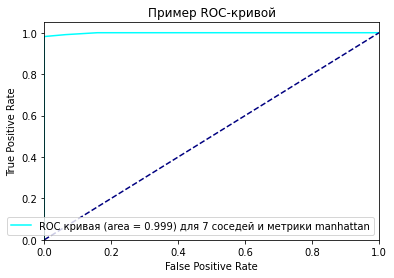

In [4]:
if __name__ == "__main__":
    main()